In [1]:
# Загружаем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Загружаем исходный дтасет
data = pd.read_csv('stud_math.csv')
data = pd.DataFrame(data)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [3]:
# Вывод основных параметров исходного датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

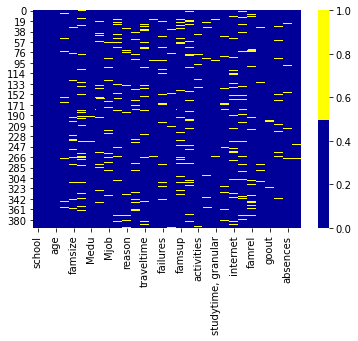

In [4]:
# Визуализируем наличие пустых ячеек в датасете с помощью тепловой карты
cols = data.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [5]:
# Заполняем пустые ячейки значением 0
data.fillna(0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              395 non-null    object 
 4   famsize              395 non-null    object 
 5   Pstatus              395 non-null    object 
 6   Medu                 395 non-null    float64
 7   Fedu                 395 non-null    float64
 8   Mjob                 395 non-null    object 
 9   Fjob                 395 non-null    object 
 10  reason               395 non-null    object 
 11  guardian             395 non-null    object 
 12  traveltime           395 non-null    float64
 13  studytime            395 non-null    float64
 14  failures             395 non-null    float64
 15  schoolsup            395 non-null    obj

In [6]:
# Фильтруем исходный датасет по колонке score. Если в ячейках столбца score находится 0, эта строка удаляется из датасет
data = data.loc[data['score'] != 0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               352 non-null    object 
 1   sex                  352 non-null    object 
 2   age                  352 non-null    int64  
 3   address              352 non-null    object 
 4   famsize              352 non-null    object 
 5   Pstatus              352 non-null    object 
 6   Medu                 352 non-null    float64
 7   Fedu                 352 non-null    float64
 8   Mjob                 352 non-null    object 
 9   Fjob                 352 non-null    object 
 10  reason               352 non-null    object 
 11  guardian             352 non-null    object 
 12  traveltime           352 non-null    float64
 13  studytime            352 non-null    float64
 14  failures             352 non-null    float64
 15  schoolsup            352 non-null    obj

#### Необходимо
Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!)

#### Описание датасета

Описание датасета
Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

In [7]:
# Дополнительные функции
#1 Функция расчёта границ выбросов
def emission_limit(Q1,Q3):
    q1 = Q1-1.5*(Q3-Q1)
    q3 = Q3+1.5*(Q3-Q1)
    return list([q1,q3])


#### 1. Устранение выбросов

In [8]:
# Формируем список наименований столбцов тип данных которых Int или Float
name_columns_num = [x for x in list(data) if data[x].dtypes == 'float' or data[x].dtypes == 'int64']

In [9]:
# Формируем датасет df, в котором нет числовых выбросов
df = data.copy()
for x in name_columns_num:
    Q1 = data[x].quantile(.25)
    Q3 = data[x].quantile(.75)    
    interval = emission_limit(Q1,Q3)
    if interval[0] != interval[1]: # Условие избежания обнуление всего датасета
        df = df.loc[(df[x] > interval[0])  & (df[x] < interval[1])]
pd.DataFrame(df.reset_index(drop=True)) # Датасет в котором отфильтрованы все выбросы по числовым столбцам

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,0,A,4.0,4.0,at_home,teacher,...,-6.0,yes,0,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,0,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,0,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,0,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,MS,F,18,R,GT3,T,4.0,4.0,teacher,at_home,...,-3.0,yes,yes,yes,4.0,4.0,3.0,5.0,7.0,30.0
250,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,...,-6.0,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
251,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
252,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               254 non-null    object 
 1   sex                  254 non-null    object 
 2   age                  254 non-null    int64  
 3   address              254 non-null    object 
 4   famsize              254 non-null    object 
 5   Pstatus              254 non-null    object 
 6   Medu                 254 non-null    float64
 7   Fedu                 254 non-null    float64
 8   Mjob                 254 non-null    object 
 9   Fjob                 254 non-null    object 
 10  reason               254 non-null    object 
 11  guardian             254 non-null    object 
 12  traveltime           254 non-null    float64
 13  studytime            254 non-null    float64
 14  failures             254 non-null    float64
 15  schoolsup            254 non-null    obj

### 2. Определяем количество уникальных значений для номинативных переменных.

In [11]:
# Формируем список наименований столбцов тип данных которых object 
name_columns = [x for x in list(data) if data[x].dtypes == 'object']

In [12]:
Obj = {x : '' for x in name_columns}
for x in name_columns:
    d = df.groupby([x]).size().reset_index(name='count')
    Obj[x] = d
    display(Obj[x])

,school,count
0,GP,223
1,MS,31


,sex,count
0,F,125
1,M,129


,address,count
0,0,12
1,R,49
2,U,193


,famsize,count
0,0,16
1,GT3,162
2,LE3,76


,Pstatus,count
0,0,24
1,A,22
2,T,208


,Mjob,count
0,0,14
1,at_home,37
2,health,23
3,other,79
4,services,62
5,teacher,39


,Fjob,count
0,0,24
1,at_home,13
2,health,10
3,other,122
4,services,64
5,teacher,21


,reason,count
0,0,11
1,course,91
2,home,59
3,other,29
4,reputation,64


,guardian,count
0,0,23
1,father,57
2,mother,162
3,other,12


,schoolsup,count
0,0,8
1,no,214
2,yes,32


,famsup,count
0,0,25
1,no,92
2,yes,137


,paid,count
0,0,29
1,no,120
2,yes,105


,activities,count
0,0,10
1,no,115
2,yes,129


,nursery,count
0,0,11
1,no,50
2,yes,193


,higher,count
0,0,13
1,no,9
2,yes,232


,internet,count
0,0,26
1,no,35
2,yes,193


,romantic,count
0,0,20
1,no,165
2,yes,69


### 3. Проведение корреляционного анализа количественных переменных датасета df

Примечание: датасет df отличается от исходного датасета data, тем что он отфильтрован

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.114168,-0.085139,0.143890,0.088791,0.163600,-0.088791,0.015481,-0.042575,0.117353,0.002413,0.171855,-0.125843
Medu,-0.114168,1.000000,0.474312,-0.066279,0.102579,-0.148106,-0.102579,0.096836,0.088207,0.147080,0.022073,0.122625,0.176829
Fedu,-0.085139,0.474312,1.000000,-0.025367,0.000249,-0.224084,-0.000249,0.029170,-0.009854,0.001262,0.047582,-0.007918,0.080729
traveltime,0.143890,-0.066279,-0.025367,1.000000,-0.135481,0.044493,0.135481,-0.027659,0.005796,0.010354,-0.064827,-0.054489,-0.037292
studytime,0.088791,0.102579,0.000249,-0.135481,1.000000,-0.070140,-1.000000,0.066813,-0.084085,-0.050230,-0.007822,-0.014031,0.070086
failures,0.163600,-0.148106,-0.224084,0.044493,-0.070140,1.000000,0.070140,-0.051846,0.119237,0.052591,0.109662,0.201389,-0.266832
"studytime, granular",-0.088791,-0.102579,-0.000249,0.135481,-1.000000,0.070140,1.000000,-0.066813,0.084085,0.050230,0.007822,0.014031,-0.070086
famrel,0.015481,0.096836,0.029170,-0.027659,0.066813,-0.051846,-0.066813,1.000000,0.107380,0.002917,0.011314,-0.072775,0.101841
freetime,-0.042575,0.088207,-0.009854,0.005796,-0.084085,0.119237,0.084085,0.107380,1.000000,0.196848,0.063802,0.056541,0.006633
goout,0.117353,0.147080,0.001262,0.010354,-0.050230,0.052591,0.050230,0.002917,0.196848,1.000000,0.011633,0.158171,-0.081587


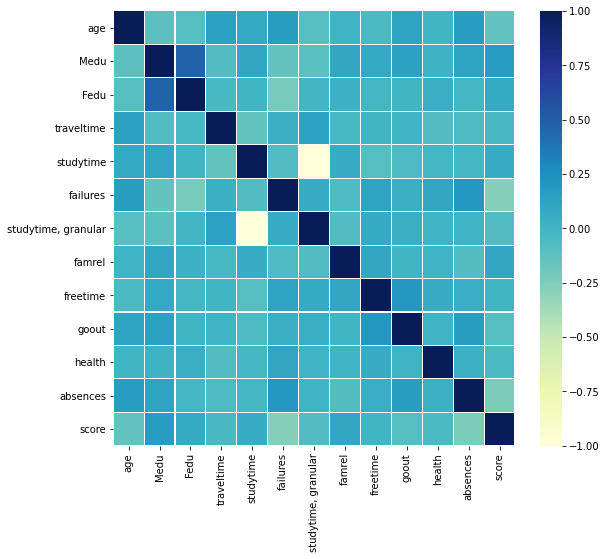

In [13]:
# Корреляционная матрица
d_corr = pd.DataFrame(df.corr())
display(d_corr)
# Визуализация корреляционной матрицы
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(d_corr, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [14]:
# Оставляем в корреляционной таблице зависимости в которых наблюдается слбая корреляция и выше.
d = d_corr.copy()
for x in list(d_corr):
    for y in list(d_corr):
        if abs(d[x][y]) < 0.1:
            d[x][y] = 'NaN'
display(d)


,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.114168,NaN,0.143890,NaN,0.163600,NaN,NaN,NaN,0.117353,NaN,0.171855,-0.125843
Medu,-0.114168,1.000000,0.474312,NaN,0.102579,-0.148106,-0.102579,NaN,NaN,0.147080,NaN,0.122625,0.176829
Fedu,NaN,0.474312,1.000000,NaN,NaN,-0.224084,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traveltime,0.143890,NaN,NaN,1.000000,-0.135481,NaN,0.135481,NaN,NaN,NaN,NaN,NaN,NaN
studytime,NaN,0.102579,NaN,-0.135481,1.000000,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
failures,0.163600,-0.148106,-0.224084,NaN,NaN,1.000000,NaN,NaN,0.119237,NaN,0.109662,0.201389,-0.266832
"studytime, granular",NaN,-0.102579,NaN,0.135481,-1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
famrel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.107380,NaN,NaN,NaN,0.101841
freetime,NaN,NaN,NaN,NaN,NaN,0.119237,NaN,0.107380,1.000000,0.196848,NaN,NaN,NaN
goout,0.117353,0.147080,NaN,NaN,NaN,NaN,NaN,NaN,0.196848,1.000000,NaN,0.158171,NaN


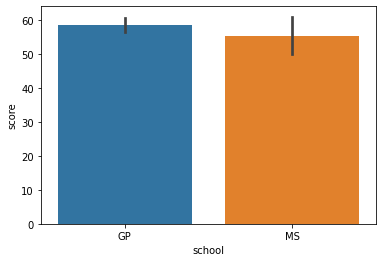

In [15]:
sns.barplot(x = 'school',y = 'score', data=df)

##### Вывод №1
Итоговый результат экзамена по математике заметно не влияеет от типа школы.

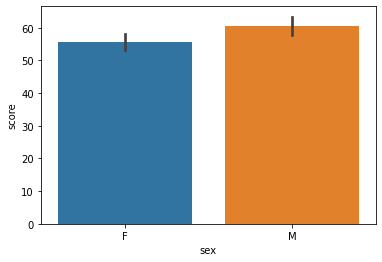

In [16]:
sns.barplot(x = 'sex',y = 'score', data=df)

##### Вывод №2
Итоговый результат экзамена по математике у мужчин выше

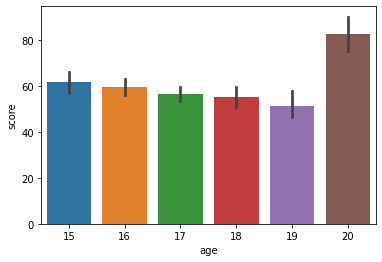

In [17]:
sns.barplot(x = 'age',y = 'score', data=df)

##### Вывод №3
Итоговый результат экзамена по математике с увеличением возраста от 15 до 19 падет, и в 20 лет резко улучшается. Видимо это связано с дополнительной подготовкой с целью поступления в высшую школу.

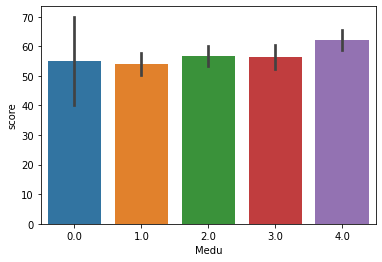

In [18]:
sns.barplot(x = 'Medu',y = 'score', data=df)

##### Вывод №4
Итоговый результат экзамена по математике, с увеличением уровня образования матери учащегося, меняется только при условии, когда мать имеет высшее образование.

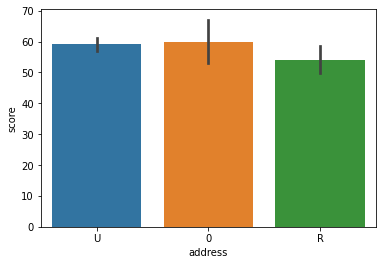

In [19]:
sns.barplot(x = 'address',y = 'score', data=df)

##### Вывод №5
Итоговый результат экзамена по математике, у городских учащихся несколько выше чем у учащихся живущих за городом. В датасете по этой позиции стоит 0, который явно по результатам экзамена выше, однако место проживания этих учащихся не определено.
Можно удалить этот столбец из анализа, предварительно исследовав результаты по этой колонке на нулевую гипотезу, что адрес проживания учащегося на результат не влияет.

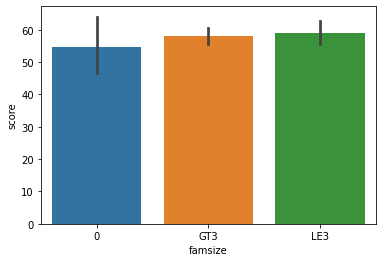

In [20]:
sns.barplot(x = 'famsize',y = 'score', data=df)

##### Вывод №6
Итоговый результат экзамена по математике от состава семьи существенно не отличается.
Можно удалить этот столбец из анализа, предварительно исследовав результаты по этой колонке на нулевую гипотезу, что состав семьи на результат не влияет.

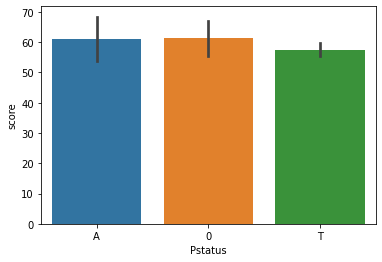

In [21]:
sns.barplot(x = 'Pstatus',y = 'score', data=df)

##### Вывод №7
Итоговый результат экзамена по математике от совместного проживания родителей существенно не отличается.
Можно удалить этот столбец из анализа, предварительно исследовав результаты по этой колонке на нулевую гипотезу, что от совместного жилья родителей результат не зависит.

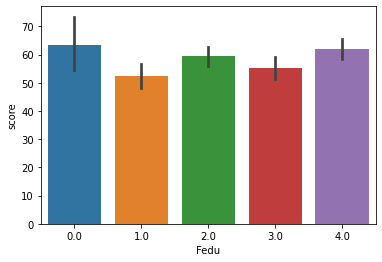

In [22]:
sns.barplot(x = 'Fedu',y = 'score', data=df)

##### Вывод №8
<i>Интересная зависимость.</i>

Получается, что результат экзамена по математике существенно выше, когда отец не имеет образования и когда отец имеет высшее образование. С последним всё понятно, а вот при первом варианте, видимо ребёнка мотивирует низкий уровень отца, как стимул учиться хорошо, чтобы по карьерной лестнице вырваться на иной уровень чем отец.

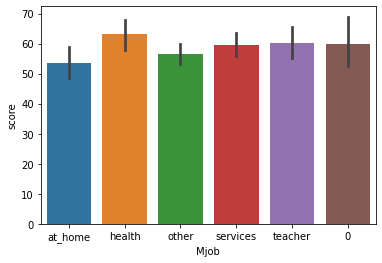

In [23]:
sns.barplot(x = 'Mjob',y = 'score', data=df)

##### Вывод №9
Существенного влияния работы матери не наблюдается, хотя несколько более высокое значение оценки по экзамену наблюдается в случае работы матери в сфере здравоохранения. Видимо мать следит за здоровьем ребёнка, что влияет на его посещаемость учебных занятий.


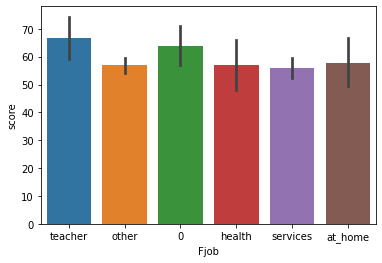

In [24]:
sns.barplot(x = 'Fjob',y = 'score', data=df)

##### Вывод №10
Существенного влияния работы отца не наблюдается, хотя несколько более высокое значение оценки по экзамену наблюдается в случае отец работает учителем. Более высокая оценка по экзамену в этом случае вполне объяснима.

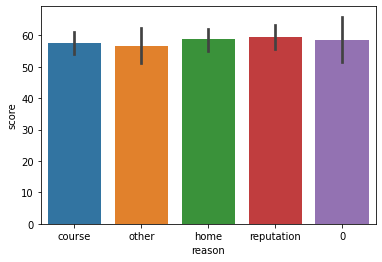

In [25]:
sns.barplot(x = 'reason',y = 'score', data=df)

##### Вывод №11
Существенного влияния причин выбора школы на результаты оценок не наблюдается. Колонку reason можно из анализа удалить.

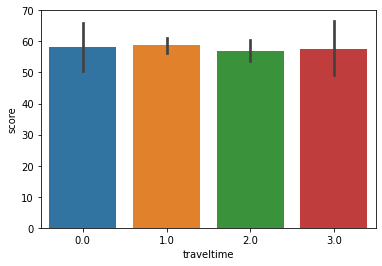

In [26]:
sns.barplot(x = 'traveltime',y = 'score', data=df)

##### Вывод №12
Влияния времени в пути до школы на результаты оценок не наблюдается. Колонку traveltime можно из анализа удалить.

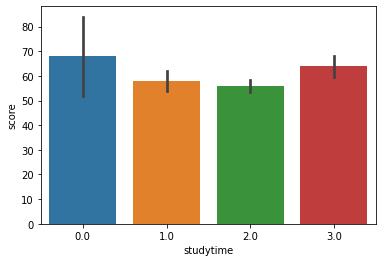

In [27]:
sns.barplot(x = 'studytime',y = 'score', data=df)

##### Вывод №13
<i>Интересная зависимость.</i>

Получается, что результат экзамена по математике существенно выше, когда учащийся время на учёбу по мимо школы в неделю, не тратит совсем и, когда у него уходит от 4 до 10 часов.
Видимо это связанно уже с умственным потенциалом учащегося. Первые более способны, вторые боле усидчивы. Хотя первые всё же ненамного имеют лучший результат по экзамену.

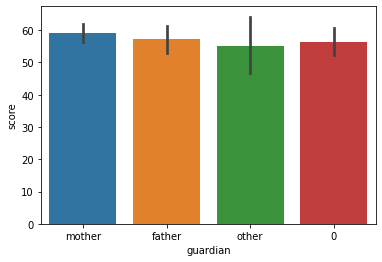

In [28]:
sns.barplot(x = 'guardian',y = 'score', data=df)

##### Вывод №14
Влияния на результаты оценок по экзамену, того кто является опекуном учащегося существенного не наблюдается. Колонку traveltime можно из анализа удалить (видимо надо проверить гипотезу на равенство). Хотя слабая тенденция мать - отец - другое в сторону понижения есть.

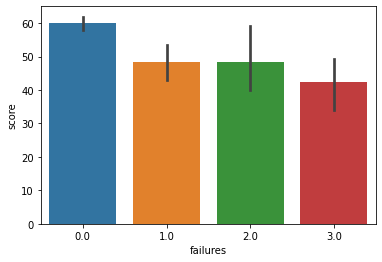

In [29]:
sns.barplot(x = 'failures',y = 'score', data=df)

##### Вывод №15

Наблюдается влияния внеучебных неудач на результаты оценок по экзамену. Что говорит о важности психического и душевного равновеся учащегося перед сдачей экзамена.

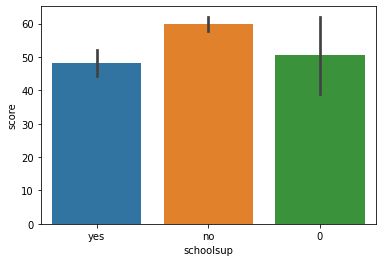

In [30]:
sns.barplot(x = 'schoolsup',y = 'score', data=df)

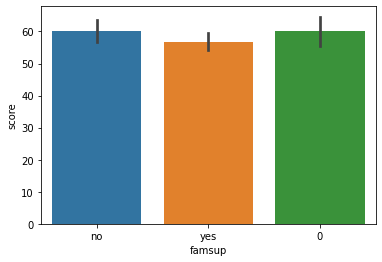

In [31]:
sns.barplot(x = 'famsup',y = 'score', data=df)

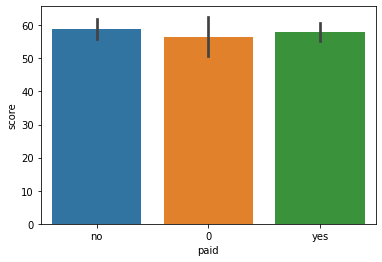

In [32]:
sns.barplot(x = 'paid',y = 'score', data=df)

##### Вывод №16

Последние три диаграммы влияния на результаты оценок говорят, что (сответсвенно) ни дополнительная образовательная поддержка, ни семейная образовательная поддержка, ни дополнительные платные образования по математике существенно не помогли учащемся показать результаты лучше тех, кто такой поддержки не "испытывал".

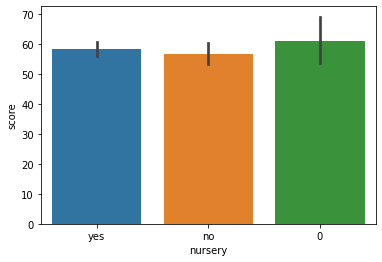

In [33]:
sns.barplot(x = 'nursery',y = 'score', data=df)

##### Вывод №17
Влияния посещения учащимися детского сада, на результаты оценок не наблюдается. Колонку nursery можно из анализа удалить.

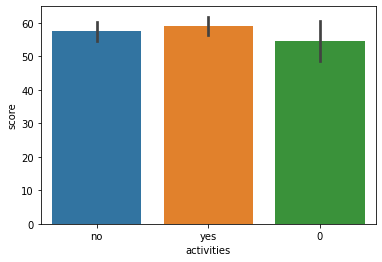

In [34]:
sns.barplot(x = 'activities',y = 'score', data=df)

##### Вывод №18
Дополнительные внеучебные занятия, на результаты оценок не влияют. Колонку activities можно из анализа удалить.

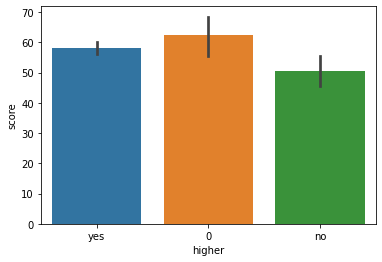

In [35]:
sns.barplot(x = 'higher',y = 'score', data=df)

##### Вывод №19
Наблюдается явная зависимость желания получить высшее образование на результаты оценок, что согласуется с выводом №8. Достаточно сильным мотиватором является желание учиться дальше, с одной из целью, занять более высокое положение по социальной лестнице.

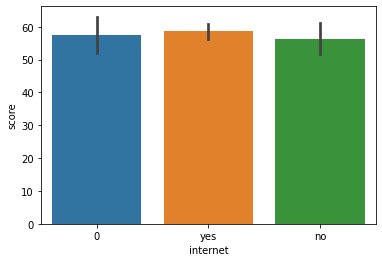

In [36]:
sns.barplot(x = 'internet',y = 'score', data=df)

##### Вывод №20
Наличие интернета дома не оказывает влияния (существенного) на результаты оценок по математике.

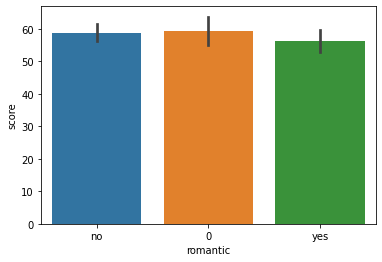

In [37]:
sns.barplot(x = 'romantic',y = 'score', data=df)

##### Вывод №21
Можно сказать, что те кто хорошо знают математику романтическими отншениями не увлекаются. Зависимост есть и её надо учитывать в дальнейшем.

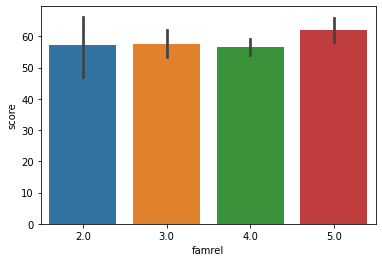

In [38]:
sns.barplot(x = 'famrel',y = 'score', data=df)

##### Вывод №22
Климат в семье достаточно сильно оказывает влияние на результаты оценок, этот тест подтверждает Вывод №15, когда рассматривалась диаграмма внеучебных неудач.

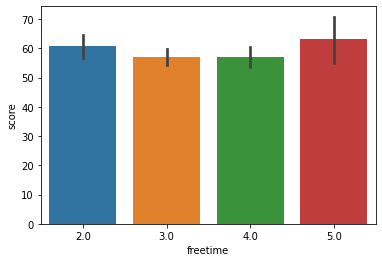

In [39]:
sns.barplot(x = 'freetime',y = 'score', data=df)

##### Вывод №23
Наблюдается зависимовсть на результаты оценок свободного времени после школы. Лучшие оценки, когда времени очень мало и когда много.

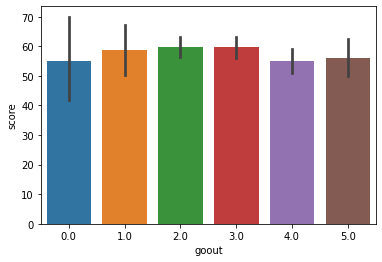

In [40]:
sns.barplot(x = 'goout',y = 'score', data=df)

##### Вывод №24
Наблюдается зависимость на результаты оценок от проведения времени с друзьями. По пяти бальной системе оценки времени, наблюдается явный рост оценки, что говорит рациональном использовании свободным временем, причём видимо использование этого времени целевое, в том числе и обсуждение математики!!!!

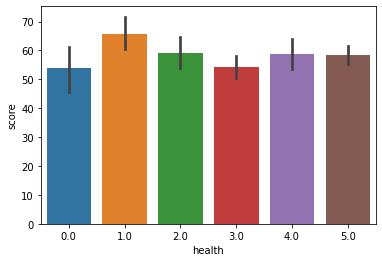

In [41]:
sns.barplot(x = 'health',y = 'score', data=df)

##### Вывод №25
<i>Результат удручающий</i>

Видимо слабым на здоровье, если конечно нет проблем с головой, математика даётся лучше...

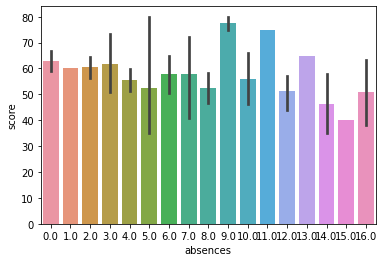

In [42]:
sns.barplot(x = 'absences',y = 'score', data=df)

##### Вывод №26
Влияние количество пропущенных занятий на результаты оценок не дают сделать однозначных выводов, хотя тенденция снижения результатов с увеличением пропущенных занятий всё же наблюдается (что логично).

#### Общий вывод
Скорей всего с математическими способностями, чуть выше среднего, надо родиться!!!

Данных (признаков) в датасете достаточно, для того чтобы проводить дальнейший анализ их влияния на результаты оценок учащихся по математике.

#### Примечание
Видимо в самом деле проблема пустых ячеек датасета стоит остро, сам уже который раз возвращаюсь на этап предобработки датасета по этой причине. Есть предложение, как говорится выработать необходимые и достаточные условия удаления строки из датасета, с колонками всё понятно.
Например.
Необходимым условием удаления строки является наличие пустой ячейки в колонке, по которой идёт сравнительный анализ, в нашем случает колонка score.
Достаточным условием является общее количество пустых ячеек в строке должно не превышать 20% от общего количества ячеек в строке. Почему 20%?
Есть такой эмпирический закон Парето, с ним можно ознакомится здесь https://ru.wikipedia.org/wiki/Закон_Парето. Вкратце он гласит:
 «20 % усилий дают 80 % результата, а остальные 80 % усилий — лишь 20 % результата»
Таким образом процедура работа с разряженным датасетом будет выглядеть следующим образом:
1.     Удаляются все строки в колонках базовых (по которым сравниваются все остальные) признаков которых пусто.
2.     Удаляются все строки, количество пустых ячеек в которых, превышают 20% от общего количество колонок в датасете (за исключением базовых)

Проведём предобработку по выше описанной процедуре

In [64]:
# Загружаем исходный дтасет
data_new = pd.read_csv('stud_math.csv')
data_new = pd.DataFrame(data_new)
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [65]:
# Заполняем пустые ячейки значением 0
data_new.fillna(0, inplace=True)

In [66]:
# Фильтруем исходный датасет по колонке score. Если в ячейках столбца score находится 0 или NaN, эта строка удаляется из датасет
df_new = data_new.loc[(data_new['score'] != 0) & (data_new['score'] != 'NaN')]
df_new = pd.DataFrame(df_new.reset_index(drop=True))

In [67]:
# Фильтруем промежуточный датасет df по всем строкам количество 0 или NaN в которых больше 20%
pareto = round((len(df_new.columns)-1)*20/100)
list_del = []# Список для записи номеров строк, в которых нулей больше чем 20%
for x in range(0,len(df_new)):
    s = 0
    for y in range(0,len(df_new.columns)):
        z = df_new.loc[x][y]
        if z == 0:
            s+=1
    if s >= pareto:
        list_del.append(x)
print(list_del)

[112, 177, 207, 241, 243]


In [68]:
# Удаляем строки количество нулей в которых больше 20%
df_new.drop(df_new.index[list_del])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               352 non-null    object 
 1   sex                  352 non-null    object 
 2   age                  352 non-null    int64  
 3   address              352 non-null    object 
 4   famsize              352 non-null    object 
 5   Pstatus              352 non-null    object 
 6   Medu                 352 non-null    float64
 7   Fedu                 352 non-null    float64
 8   Mjob                 352 non-null    object 
 9   Fjob                 352 non-null    object 
 10  reason               352 non-null    object 
 11  guardian             352 non-null    object 
 12  traveltime           352 non-null    float64
 13  studytime            352 non-null    float64
 14  failures             352 non-null    float64
 15  schoolsup            352 non-null    obj

In [69]:
df_new

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,0,A,4.0,4.0,at_home,teacher,...,-6.0,yes,0,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,0,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,0,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,0,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
348,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
349,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,0,no,no,5.0,5.0,3.0,3.0,3.0,35.0
350,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [70]:
# Формируем датасет df, в котором нет числовых выбросов
df = df_new.copy()
for x in name_columns_num:
    Q1 = data[x].quantile(.25)
    Q3 = data[x].quantile(.75)    
    interval = emission_limit(Q1,Q3)
    if interval[0] != interval[1]: # Условие избежания обнуление всего датасета
        df = df.loc[(df[x] > interval[0])  & (df[x] < interval[1])]
pd.DataFrame(df.reset_index(drop=True)) # Датасет в котором отфильтрованы все выбросы по числовым столбцам

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,0,A,4.0,4.0,at_home,teacher,...,-6.0,yes,0,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,0,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,0,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,0,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,MS,F,18,R,GT3,T,4.0,4.0,teacher,at_home,...,-3.0,yes,yes,yes,4.0,4.0,3.0,5.0,7.0,30.0
250,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,...,-6.0,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
251,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
252,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


### Вывод

Применение иной процедуры предобработки исходного датасета не изменило количество строк после удаление выбросов. Это говорит о том, что применённая процедура не затронула (видимо) информационную содержательность обработанного датасета.